In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Data Initialization

In [2]:
df = pd.read_csv('data/voter_data_cleaned.csv')

In [5]:
df.drop(columns=['V200001'], inplace=True)

In [7]:
df.head()

,V201005,V201006,V201020,V201018,V201016,V201222,V202014,V202016,V202022,V202029,V202219,V201357,V202426,V201357.1,V201360,V201336,V202221,V202222,V202223,V202224
0,2,2,1,2,3,-1,2,2,1,1,2,1,4,1,2,2,3,3,3,3
1,4,3,1,4,3,-1,1,2,1,2,2,1,3,1,2,4,3,3,3,3
2,1,2,1,-1,3,3,2,1,1,1,1,2,1,2,1,4,2,2,2,1
3,2,3,2,2,3,2,2,2,1,2,1,1,2,1,1,1,5,5,5,5
4,2,2,1,4,2,2,2,2,2,2,3,1,3,1,1,3,4,4,4,4


# Data Normalization

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,V201005,V201006,V201020,V201018,V201016,V201222,V202014,V202016,V202022,V202029,V202219,V201357,V202426,V201357.1,V201360,V201336,V202221,V202222,V202223,V202224
0,-0.299850,0.551519,-0.687556,0.797403,0.739692,-0.921670,0.355311,0.347483,0.292356,0.069559,0.228245,-0.523372,0.684664,-0.523372,0.340330,-0.636742,0.341057,0.289843,0.218350,0.400306
1,1.621048,1.951452,-0.687556,1.911467,0.739692,-0.921670,-0.055924,0.347483,0.292356,0.491188,0.228245,-0.523372,0.363655,-0.523372,0.340330,0.619447,0.341057,0.289843,0.218350,0.400306
2,-1.260300,0.551519,-0.687556,-0.873693,0.739692,1.771616,0.355311,-0.064187,0.292356,0.069559,-0.125729,0.549547,-0.278363,0.549547,-0.630033,0.619447,0.019642,-0.025975,-0.085505,-0.254416
3,-0.299850,1.951452,0.744636,0.797403,0.739692,1.098295,0.355311,0.347483,0.292356,0.491188,-0.125729,-0.523372,0.042646,-0.523372,-0.630033,-1.264837,0.983886,0.921479,0.826060,1.055027
4,-0.299850,0.551519,-0.687556,1.911467,-0.042911,1.098295,0.355311,0.347483,0.751083,0.491188,0.582220,-0.523372,0.363655,-0.523372,-0.630033,-0.008648,0.662472,0.605661,0.522205,0.727666


# 3-Dimensional PCA

In [15]:
pca = PCA(n_components=3)
data_after_pca = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data_after_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

,PC1,PC2,PC3
0,1.038712,-0.902767,-0.230846
1,0.897287,-0.440885,1.483096
2,0.002363,0.725333,-1.141509
3,1.674369,-1.059879,0.908777
4,1.724323,-0.816609,-0.320405


In [16]:
for i, value in enumerate(pca.explained_variance_ratio_):
    print(f"PCA {i+1} Explained Variance: {value:.4f}")
    
print(f"\nTotal Explained Variance: {sum(pca.explained_variance_ratio_):.4f}")

PCA 1 Explained Variance: 0.4475
PCA 2 Explained Variance: 0.1087
PCA 3 Explained Variance: 0.0959

Total Explained Variance: 0.6521


# K-Means Clustering

In [18]:
silhouette_scores = []
k_vals = range(2, 11)
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    labels = kmeans.labels_
    score = silhouette_score(pca_df, labels)
    silhouette_scores.append(score)

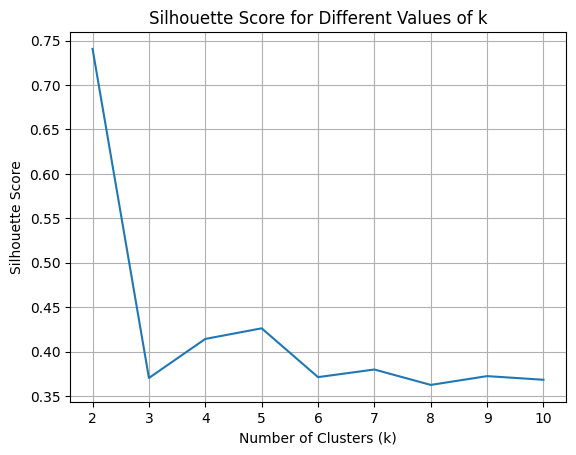

In [19]:
plt.plot(k_vals, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.grid(True)
plt.show()
    

I will use the values for k that have the highest silhouette score. 
- k=2
- k=5
- k=6

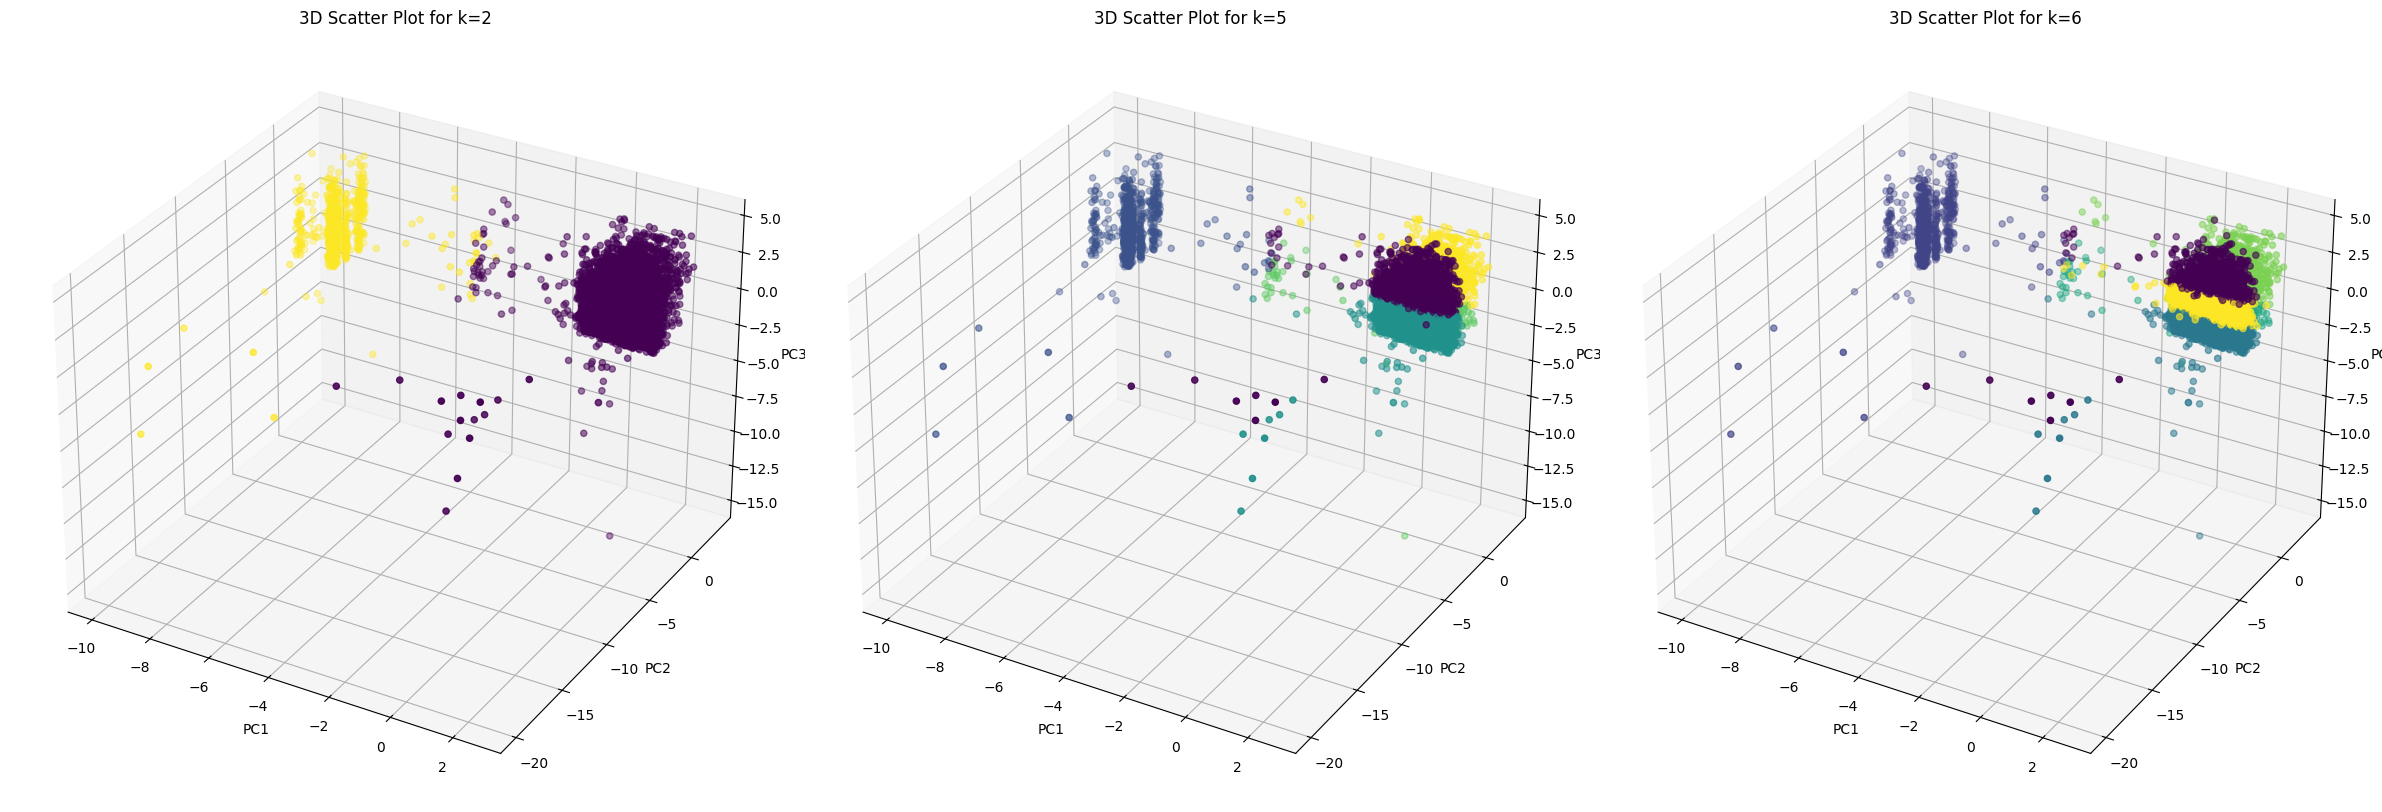

In [21]:

fig = plt.figure(figsize=(24, 8))

k_vals = [2, 5, 6]
for i, k in enumerate(k_vals):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    labels = kmeans.labels_
    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=labels, cmap='viridis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'3D Scatter Plot for k={k}')

plt.tight_layout()
plt.show()
    

# Hierarchical Clustering

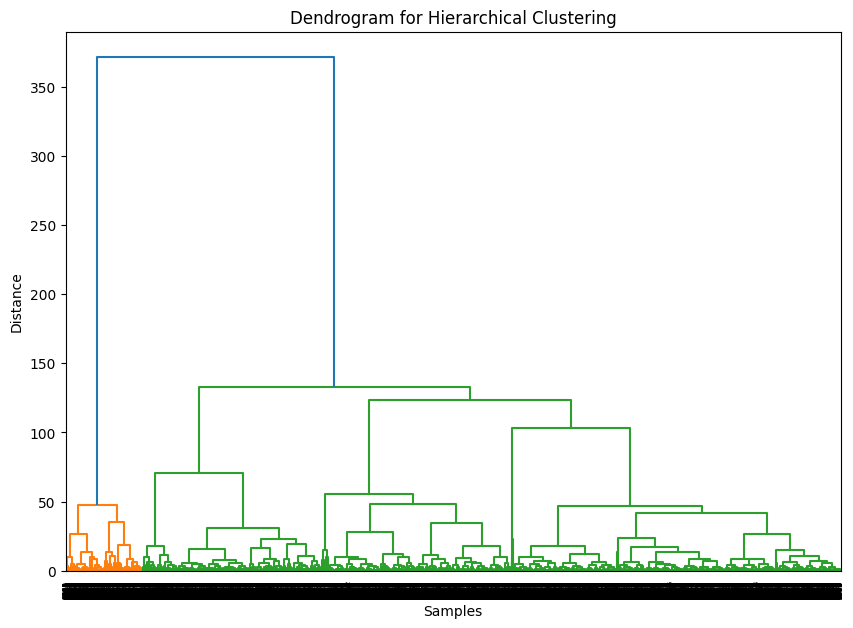

In [23]:
linked = linkage(pca_df, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


# DBSCAN

In [25]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_df)

In [27]:
eps_range = np.linspace(0.1, 1.0, 10)
min_samples_range = range(2, 11)

best_score = -1
best_eps = 0
best_min_samples = 0

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(pca_df)
        score = silhouette_score(pca_df, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Best Eps: {best_eps:.4f}")
print(f"Best Min Samples: {best_min_samples}")


Best Silhouette Score: 0.4530
Best Eps: 0.5000
Best Min Samples: 9


In [28]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(pca_df)

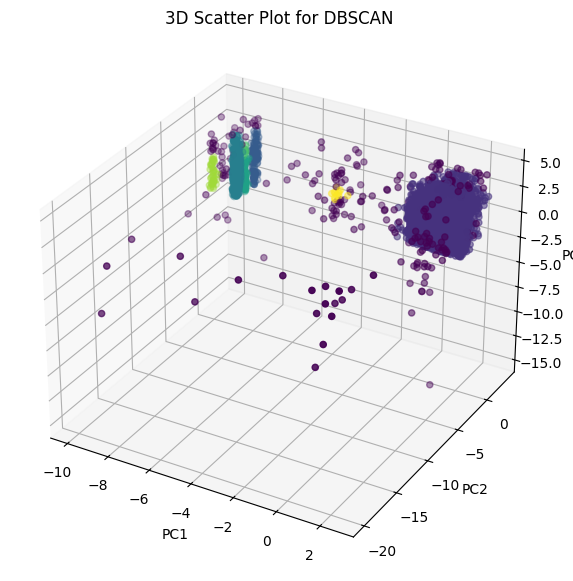

In [29]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=dbscan_labels, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot for DBSCAN')
plt.show()
